**Make sure to include** `import allow_local_imports` on top of every notebook in `notebooks/` dir to be able to use `lib/` modules.

In [1]:
# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports

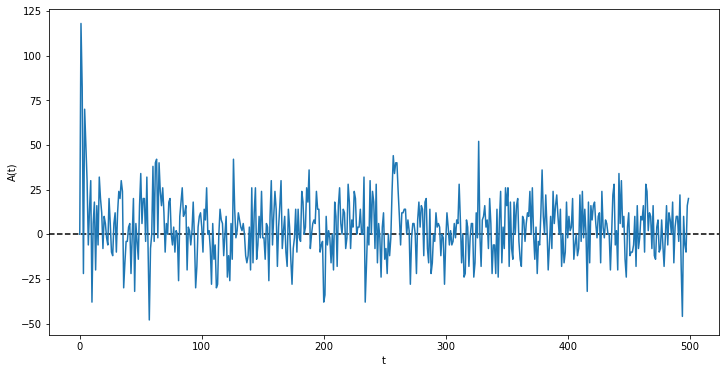

In [2]:
# Use anything from lib package
# E.g.
from lib.functions import simulate_simple_game

simulate_simple_game()

In [2]:
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator, DistributionMemoryGenerator
from lib.plots import default_plot


In [ ]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        0.3: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy, DefaultStrategy]),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
        0.5: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[FiftyFiftyStrategy, DefaultStrategy, AlwaysOneStrategy],
                strategy_update_rate=0.8
            ),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
        0.2: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[FiftyFiftyStrategy, DefaultStrategy]
            ),
            memory_generator=UniformMemoryGenerator(m=2)
        ),
    }
).simulate_game()

default_plot(times, attendances)

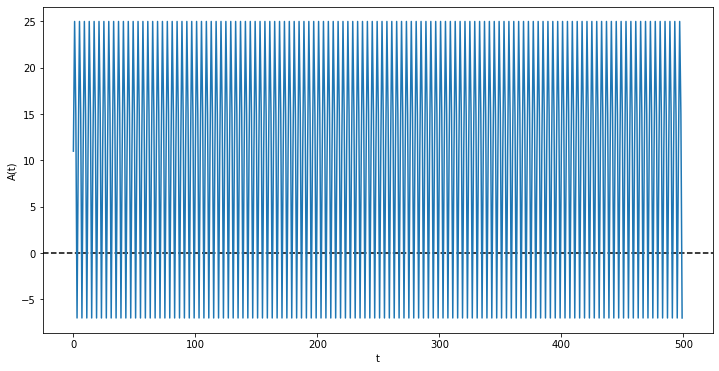

In [4]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
    }
).simulate_game()

default_plot(times, attendances)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [18]:
class BaseMemoryGenerator:
    """
    Abstract class that should be subclassed when implementing
    a new memory generator.
    """
    def __init__(self, m = 3, n_agents = 201, min_m = 1, max_m = 20):
        self.m = m
        self.n_agents = n_agents

    def generate(self, size):
        raise NotImplementedError

In [19]:
class DistributionMemoryGenerator(BaseMemoryGenerator):
    """
    Samples memory from a distribution
    (Memories are distributed by default normal distribution.)
    """

    def generate(self, n_agents, min_m = 1, max_m = 20):
        x = np.linspace(min_m, max_m, 1000)
        mean = np.mean(x)
        sd = np.std(x)
        y =  norm.pdf(x, mean, sd)
        sample = np.random.choice(x, n_agents, p=y/(sum(y))).astype(int)
        return sample

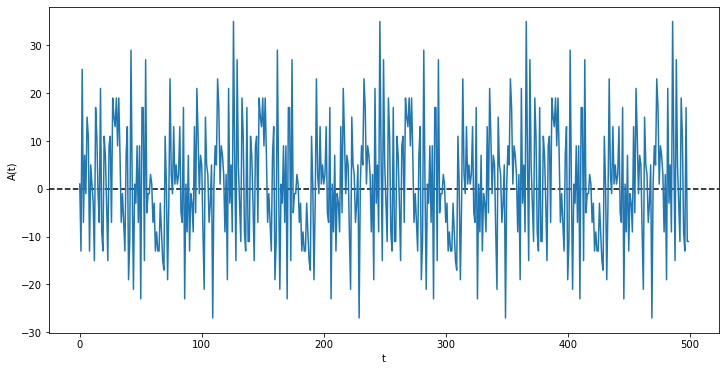

In [20]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=DistributionMemoryGenerator(n_agents = 201)
        ),
    }
).simulate_game()

default_plot(times, attendances)

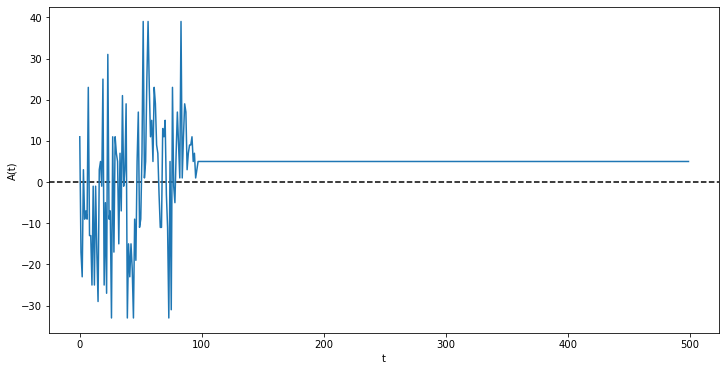

In [21]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=DistributionMemoryGenerator(n_agents = 201, min_m = 1, max_m = 2)
        ),
    }
).simulate_game()

default_plot(times, attendances)

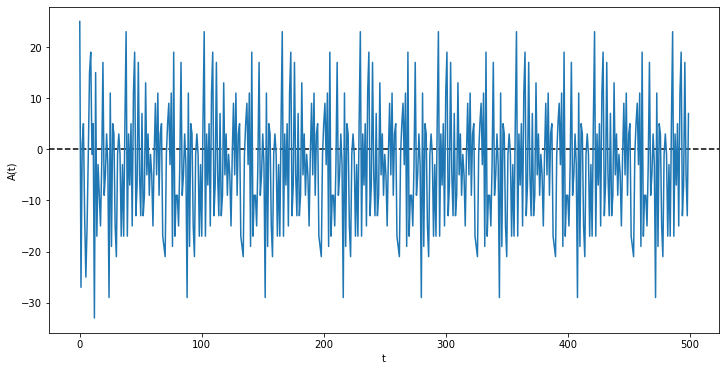

In [22]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=DistributionMemoryGenerator(n_agents = 201, min_m = 10, max_m = 20)
        ),
    }
).simulate_game()

default_plot(times, attendances)

## Plotting the histogram of normal distribution

In [14]:
n_agents = 201
min_m = 1
max_m = 20
x = np.linspace(min_m, max_m, 1000)
mean = np.mean(x)
sd = np.std(x)
y =  norm.pdf(x, mean, sd)

sample = np.random.choice(x, n_agents, p=y/(sum(y))).astype(int)
sample

array([17, 10, 10, 12, 19,  9, 11,  9,  6, 12,  6,  8, 11,  6,  5, 14, 12,
        6, 19, 14, 12,  4,  6, 15,  5, 11, 18, 17, 11,  4,  5,  9,  5,  7,
       12, 14, 16, 16, 17, 16, 10,  5,  7,  2,  3,  8, 14,  2,  4, 17,  3,
       10, 14, 12, 10, 18,  5, 12, 10,  2,  6, 11, 10,  6,  8, 14, 17,  4,
       16,  9,  3, 11, 10, 12,  8,  1, 13,  4,  9,  1,  7, 11, 16, 16,  6,
        5,  7, 13, 18,  6,  9, 10, 14,  1, 14,  9, 12,  9, 13, 10, 15,  8,
       12,  6,  7, 17,  8, 13,  5, 15, 19, 12, 19, 15,  5,  8,  1,  5,  7,
        1, 15,  6,  4, 18,  3,  9,  9, 18,  4,  4,  9,  4,  8, 11,  1,  9,
        8, 14,  9,  1,  3, 16, 11, 10,  3, 10, 13,  8, 15, 18, 13, 15, 12,
        8, 11, 12, 10, 16,  9,  9, 14, 13,  3, 17,  9,  7,  9,  2,  4, 17,
       15, 13, 12, 13,  8, 19,  7,  6, 14, 13, 13,  1, 10, 14, 14,  8, 15,
       14, 15, 16, 11,  7, 15,  4,  5,  4, 10, 11, 17,  2,  8])

C:\Users\Reetta\Anaconda3\envs\abm-project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


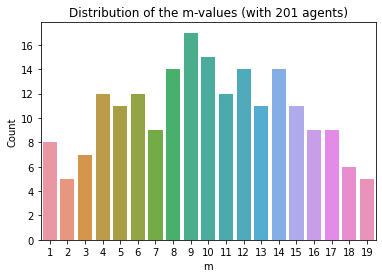

In [15]:
# Numpy arrays containing counts for each side
side, count = np.unique(sample, return_counts=True)

# Plot the results
sns.barplot(side, count)
plt.title(
    f"Distribution of the m-values (with {n_agents} agents)")
plt.ylabel("Count")
plt.xlabel("m")
plt.show()